In [14]:
# Feel free to import any other libraries and modules.
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from torch import nn
from torch.utils.data import DataLoader, Subset

# Part One: Optimization Algorithms
## 1. Gradient Descent
The Gradient Descent (GD) algorithm finds the minimum of a given
function by taking small steps along the function's gradient:

>$\Theta \leftarrow \Theta_0$

>**while** stop condition not met **do**

>$~~~~$$\Theta \leftarrow \Theta - \alpha \nabla_\Theta f(\Theta)$

>**end while**

where $f$ is the function to minimize, $\nabla_\Theta f(\Theta)$
denotes $f$'s gradient at $\Theta$ and $\alpha$ is the learning rate.

**Task1:** Implement the GD algorithm as a function:

  \begin{equation}
      \Theta_{opt} = \text{GD}(f, \Theta_0, \alpha, \rho)
  \end{equation}
where $f$ is a function returning the cost and its gradient with respect to parameter vector $\Theta$, $\Theta_0$ is the initial value, and $\alpha$
is the learning rate. You can assume that $\alpha$. remains constant during the optimization. $\rho$ is stop condition. \\
Then, use the GD algorithm to find the optimum of the [Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function) (Consider $a=1, b=100$).
 \\
Also, plot the values found by GD at subsequent iterations.

## 2. Newton's Method
Newton's method is an iterative optimization algorithm used to find the minimum of a function.
The basic update step in Newton's method is given by:

\begin{equation}
\Theta = \Theta - H^{-1} \cdot \nabla f(\Theta)
\end{equation}


Where  $ H $ is the Hessian matrix of the function at $ \Theta $, and $ H^{-1} $ is the inverse of the Hessian matrix, used to adjust the step size and direction more accurately than just using the gradient alone (as done in gradient descent).

#### Line Search
Sometimes, Newton's method may take too large of a step, which can lead to divergence. To prevent this, a simple **line search** is used. This reduces the step size $ \alpha $ if the function value doesn't improve after the step.

Steps:
1. Compute the gradient and Hessian matrix at the current point.
2. Calculate the step direction by multiplying the inverse of the Hessian with the gradient.
3. Update the point by subtracting the step from the current point.
4. If the function value doesn't improve, reduce the step size $ \alpha $.
5. Repeat until the gradient becomes sufficiently small (close to zero), indicating convergence.



**Task2:** Implement Newton's method and compare it with the gradient descent. You will also need to implement a line search alogithm, e.g. (https://en.wikipedia.org/wiki/Backtracking_line_search) and make sure that the Newton's direction is indeed one along which the function is minimized.


In [15]:
def rosenbrock(x):
    """Returns the value and gradient of Rosenbrock's function at x: 2d vector"""
    a, b = 1, 100

    val = (a - x[0])**2 + b * (x[1] - x[0]**2)**2
    dv_dx0 = -2 * (a - x[0]) - 4 * b * x[0] * (x[1] - x[0]**2)
    dv_dx1 = 2 * b * (x[1] - x[0]**2)
    grad = np.array([dv_dx0, dv_dx1])

    return val, grad


def rosenbrock_hessian(x):
    """Returns the value, gradient and hessian of Rosenbrock's function at x: 2d vector"""
    a, b = 1, 100
    val, grad = rosenbrock(x)

    # Hessian matrix components
    d2v_dx0x0 = 2 - 4 * b * x[1] + 12 * b * x[0]**2
    d2v_dx0x1 = -4 * b * x[0]
    d2v_dx1x0 = d2v_dx0x1
    d2v_dx1x1 = 2 * b

    # Hessian matrix
    hessian = np.array([[d2v_dx0x0, d2v_dx0x1],
                [d2v_dx1x0, d2v_dx1x1]])

    return val, grad, hessian


def GD(f, theta0, alpha, stop_tolerance=1e-10, max_steps=1000000):
    """Runs gradient descent algorithm on f.

    Args:
        f: function that when evaluated on a Theta of same dtype and shape as Theta0
            returns a tuple (value, dv_dtheta) with dValuedTheta of the same shape
            as Theta
        theta0: starting point
        alpha: step length
        stop_tolerance: stop iterations when improvement is below this threshold
        max_steps: maximum number of steps
    Returns:
        tuple:
        - theta: optimum theta found by the algorithm
        - history: list of length num_steps containing tuples (theta, (val, dv_dtheta: np.array))

    """
    history = []
    theta = theta0
    step = 0
    while step < max_steps:
        val, grad = f(theta)
        theta_new = theta - alpha * grad
        history.append((theta, val))
        if np.linalg.norm(theta_new - theta) < stop_tolerance:
            break
        theta = theta_new
        step += 1

    return theta, history  

Found optimum at [0.99999989 0.99999978] in 37027 steps (true minimum is at [1,1])


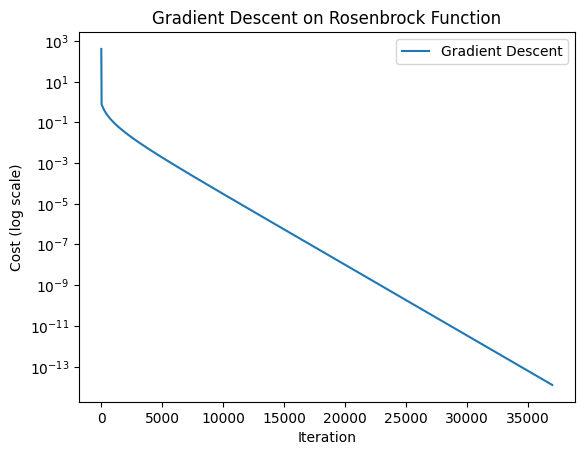

Found optimum at [0.99999989 0.99999978] in 37027 steps (true minimum is at [1,1])


In [16]:
# Find the optimum of rosenbrock function

X0 = [0.,2.]
Xopt, Xhist = GD(rosenbrock, X0, alpha=1e-3, stop_tolerance=1e-10, max_steps=1e6)

print ("Found optimum at %s in %d steps (true minimum is at [1,1])" % (Xopt, len(Xhist)))

# Plot how the value changes over iterations
#TODO

cost_values = [val for _, val in Xhist]

plt.plot(cost_values, label="Gradient Descent")
plt.yscale("log")
plt.xlabel("Iteration")
plt.ylabel("Cost (log scale)")
plt.title("Gradient Descent on Rosenbrock Function")
plt.legend()
plt.show()

# Print the final optimal value and step count
print("Found optimum at %s in %d steps (true minimum is at [1,1])" % (Xopt, len(Xhist)))

In [17]:
def backtracking_line_search(f, x, direction, alpha=1.0, rho=0.8, c=1e-4):
    """Backtracking line search to find optimal step size"""
    fx, grad = f(x)[:2]  # Only value and gradient are needed for line search
    while f(x + alpha * direction)[0] > fx + c * alpha * np.dot(grad, direction):
        alpha *= rho
    return alpha

Found optimum at [1. 1.] (true minimum is at [1,1])


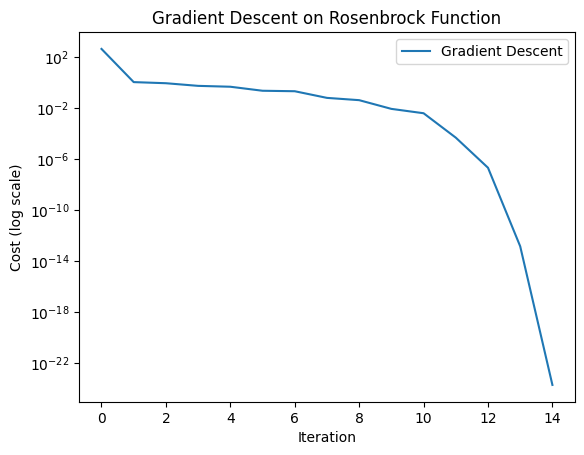

Found optimum at [1. 1.] in 15 steps (true minimum is at [1,1])


In [18]:
# Newton's Method
def Newton(f, theta0, alpha=1, stop_tolerance=1e-10, max_steps=1000000):
    """Performs Newton's optimization method with a simple line search.

    Args:
        f: function that when evaluated on a Theta of same dtype and shape as Theta0
            returns a tuple (value, gradient, hessian), where gradient and Hessian
            have the same shape as Theta.
        theta0: starting point.
        alpha: step length for backtracking line search (default is 1).
        stop_tolerance: stop iterations when the norm of the gradient is below this threshold.
        max_steps: maximum number of iterations.
    Returns:
        tuple:
        - theta: optimal Theta after convergence or maximum steps.
        - history: list of tuples (theta, value, gradient) containing the optimization path.
    """
    theta = theta0
    history = []
    # TODO
    step = 0
    while step < max_steps:
        val, grad, hessian = f(theta)
        try:
            hessian_inv = np.linalg.inv(hessian)
        except np.linalg.LinAlgError:
            print("Singular Hessian, stopping optimization")
            break
        direction = -np.dot(hessian_inv, grad)
        alpha = backtracking_line_search(lambda x: f(x), theta, direction)
        theta_new = theta + alpha * direction
        history.append((theta, val))
        if np.linalg.norm(theta_new - theta) < stop_tolerance:
            break
        theta = theta_new
        step += 1



    return theta, history

# Test Newton's method on the Rosenbrock function
X0 = [0., 2.]  # Initial guess
Xopt, Xhist = Newton(rosenbrock_hessian, X0)

print("Found optimum at %s (true minimum is at [1,1])" % Xopt)

cost_values = [val for _, val in Xhist]

plt.plot(cost_values, label="Gradient Descent")
plt.yscale("log")
plt.xlabel("Iteration")
plt.ylabel("Cost (log scale)")
plt.title("Gradient Descent on Rosenbrock Function")
plt.legend()
plt.show()

# Print the final optimal value and step count
print("Found optimum at %s in %d steps (true minimum is at [1,1])" % (Xopt, len(Xhist)))

# Part two: MLP for MNIST Classification
In this part, we are going to use `PyTorch`. If you want to become more familiar with it, check this resource: https://www.learnpytorch.io/

#### In this homework, you need to
- implement SGD optimizer (`./optimizer.py`)
- implement forward and backward for FCLayer (`layers.py`)
- implement forward and backward for SigmoidLayer (`layers.py`)
- implement forward and backward for ReLULayer (`layers.py`)
- implement forward and backward for DropoutLayer (`layers.py`)
- implement train and test process (`solver.py`)

In [19]:
from layers import FCLayer, SigmoidLayer, ReLULayer
from solver import train, test, train_one_epoch
from optimizer import SGD

In [20]:
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [21]:
# Load MNIST dataset

# Converts PIL image to tensor and scales to [0, 1] and flatten it
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1)),
])

# Load MNIST dataset with the defined transform
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# One-hot encoding for labels
def decode_label(label, num_classes=10):
    return torch.nn.functional.one_hot(torch.tensor(label), num_classes=num_classes).float()

# Preprocess labels and combine with transformed images
y_train = [decode_label(label) for _, label in train_dataset]
y_test = [decode_label(label) for _, label in test_dataset]

# Convert the data into tensor datasets for training and testing
train_dataset = TensorDataset(torch.stack([img for img, _ in train_dataset]), torch.stack(y_train))
test_dataset = TensorDataset(torch.stack([img for img, _ in test_dataset]), torch.stack(y_test))

# Create data loaders
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [22]:
num_epoch = 20

criterion = nn.CrossEntropyLoss()

# Build MLP with FCLayer and SigmoidLayer you've implemented in layers.py
sigmoidMLP = nn.Sequential(
    FCLayer(784, 128),
    SigmoidLayer(),
    FCLayer(128, 10)
)

# Initialize optimizer you've implemented in optimizer.py
sgd = SGD(params=sigmoidMLP.parameters(), learning_rate=0.01)

# Train the model using train function you've implemented in solver.py
sigmoidMLP = train(sigmoidMLP, criterion, sgd, train_dataloader, num_epoch, device=device)


Epoch [0] Average training loss: 1.4522, Average training accuracy: 0.3176

Epoch [1] Average training loss: 0.7008, Average training accuracy: 0.3181

Epoch [2] Average training loss: 0.5236, Average training accuracy: 0.3056

Epoch [3] Average training loss: 0.4494, Average training accuracy: 0.2991

Epoch [4] Average training loss: 0.4079, Average training accuracy: 0.3147

Epoch [5] Average training loss: 0.3810, Average training accuracy: 0.3050

Epoch [6] Average training loss: 0.3618, Average training accuracy: 0.3033

Epoch [7] Average training loss: 0.3471, Average training accuracy: 0.3263

Epoch [8] Average training loss: 0.3354, Average training accuracy: 0.3036

Epoch [9] Average training loss: 0.3256, Average training accuracy: 0.3032

Epoch [10] Average training loss: 0.3174, Average training accuracy: 0.3264

Epoch [11] Average training loss: 0.3103, Average training accuracy: 0.3098

Epoch [12] Average training loss: 0.3038, Average training accuracy: 0.3035

Epoch [1

In [23]:
# Test your model using test function you've implemented in solver.py
test(sigmoidMLP, test_dataloader, device)

The test accuracy is 0.0320.



In [11]:
# Build MLP with FCLayer and ReLULayer
reluMLP = nn.Sequential(
    FCLayer(784, 128),
    ReLULayer(),
    FCLayer(128, 10)
)

# Initialize optimizer
sgd = SGD(reluMLP.parameters(), learning_rate=0.01)

# Train the model
reluMLP = train(reluMLP, criterion, sgd, train_dataloader, num_epoch, device=device)


Epoch [0] Average training loss: 0.0712, Average training accuracy: 0.3159

Epoch [1] Average training loss: 0.0467, Average training accuracy: 0.3344

Epoch [2] Average training loss: 0.0399, Average training accuracy: 0.3190

Epoch [3] Average training loss: 0.0357, Average training accuracy: 0.3062

Epoch [4] Average training loss: 0.0327, Average training accuracy: 0.3220

Epoch [5] Average training loss: 0.0305, Average training accuracy: 0.3156

Epoch [6] Average training loss: 0.0288, Average training accuracy: 0.3115

Epoch [7] Average training loss: 0.0274, Average training accuracy: 0.3109

Epoch [8] Average training loss: 0.0262, Average training accuracy: 0.3053

Epoch [9] Average training loss: 0.0253, Average training accuracy: 0.3183

Epoch [10] Average training loss: 0.0244, Average training accuracy: 0.3215

Epoch [11] Average training loss: 0.0237, Average training accuracy: 0.3106

Epoch [12] Average training loss: 0.0231, Average training accuracy: 0.3152

Epoch [1

In [12]:
# Test the model
test(reluMLP, test_dataloader, device)

The test accuracy is 0.0307.



### Overfit the model
Try to overfit the reluMLP model. You can make the model as complex as you like, use subset of the data for training or any other approach you want.
Then add **DropoutLayer** to your model in order to reduce overfitting problem.

In [24]:
#TODO: overfit the reluMLP model
class ReLUMlpOverfitModel(nn.Module):
    def __init__(self):
        super(ReLUMlpOverfitModel, self).__init__()
        self.layers = nn.Sequential(
            FCLayer(784, 256),
            ReLULayer(),
            FCLayer(256, 128),
            ReLULayer(),
            FCLayer(128, 64),
            ReLULayer(),
            FCLayer(64, 10)
        )

    def forward(self, x):
        return self.layers(x)

reluMLP = ReLUMlpOverfitModel()

In [26]:
criterion = nn.CrossEntropyLoss()
sgd = SGD(params=reluMLP.parameters(), learning_rate=0.0001)

subset_indices = list(range(100))  
train_subset = Subset(train_dataset, subset_indices)
train_dataloader = DataLoader(train_subset, batch_size=32, shuffle=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
reluMLP = train(reluMLP, criterion, sgd, train_dataloader, num_epoch=100, device=device)


Epoch [0] Average training loss: 2.3038, Average training accuracy: 0.8750

Epoch [1] Average training loss: 2.3112, Average training accuracy: 0.7109

Epoch [2] Average training loss: 2.3119, Average training accuracy: 0.3828

Epoch [3] Average training loss: 2.2939, Average training accuracy: 0.7031

Epoch [4] Average training loss: 2.3113, Average training accuracy: 0.5156

Epoch [5] Average training loss: 2.2868, Average training accuracy: 1.3125

Epoch [6] Average training loss: 2.2880, Average training accuracy: 0.9062

Epoch [7] Average training loss: 2.3072, Average training accuracy: 0.6719

Epoch [8] Average training loss: 2.3115, Average training accuracy: 0.8828

Epoch [9] Average training loss: 2.2915, Average training accuracy: 0.8906

Epoch [10] Average training loss: 2.2982, Average training accuracy: 0.9453

Epoch [11] Average training loss: 2.2948, Average training accuracy: 0.4453

Epoch [12] Average training loss: 2.2895, Average training accuracy: 1.0000

Epoch [1

In [37]:
from layers import DropoutLayer

#TODO: add DropoutLayer to your model
class dropout_model(nn.Module):
    def __init__(self):
        super(dropout_model, self).__init__()
        self.layers = nn.Sequential(
        FCLayer(784, 256),
        ReLULayer(),
        DropoutLayer(0.5), 
        FCLayer(256, 128),
        ReLULayer(),
        DropoutLayer(0.5), 
        FCLayer(128, 64),
        ReLULayer(),
        DropoutLayer(0.5), 
        FCLayer(64, 10)
    )

    def forward(self, x):
        return self.layers(x)
    
dropout_model_ = nn.Sequential(
    FCLayer(784, 256),
    ReLULayer(),
    DropoutLayer(0.5), 
    FCLayer(256, 128),
    ReLULayer(),
    DropoutLayer(0.5), 
    FCLayer(128, 64),
    ReLULayer(),
    DropoutLayer(0.5), 
    FCLayer(64, 10)
)

criterion = nn.CrossEntropyLoss()
subset_indices = list(range(100))  
train_subset = Subset(train_dataset, subset_indices)
train_dataloader = DataLoader(train_subset, batch_size=32, shuffle=True)

dd = dropout_model().to(device)

sgd_dropout = SGD(params=dropout_model_.parameters(), learning_rate=0.01)
dropout = train(dropout_model_, criterion, sgd_dropout, train_dataloader, num_epoch=100, device=device)



Epoch [0] Average training loss: 2.5028, Average training accuracy: 0.9297

Epoch [1] Average training loss: 2.6765, Average training accuracy: 0.7578

Epoch [2] Average training loss: 2.2375, Average training accuracy: 0.7109

Epoch [3] Average training loss: 2.3621, Average training accuracy: 0.7500

Epoch [4] Average training loss: 2.5495, Average training accuracy: 1.1250

Epoch [5] Average training loss: 2.4093, Average training accuracy: 1.0391

Epoch [6] Average training loss: 2.3633, Average training accuracy: 1.4453

Epoch [7] Average training loss: 2.2608, Average training accuracy: 0.7344

Epoch [8] Average training loss: 2.2755, Average training accuracy: 0.4375

Epoch [9] Average training loss: 2.5127, Average training accuracy: 1.2812

Epoch [10] Average training loss: 2.3194, Average training accuracy: 0.8047

Epoch [11] Average training loss: 2.3293, Average training accuracy: 0.5703

Epoch [12] Average training loss: 2.1628, Average training accuracy: 1.5000

Epoch [1